## **Chapter 6: Using a Neural Network to Fit the Data**
*  Understanding the use of non-linear activation functions as the key difference from linear models
*  Experimenting with many different kinds of activation functions in common use
*  Implementing PyTorch's **nn** module that contains neural network building blocks
*  Solving a simple linear-fit problem with a neural network

### **6.1 Recall the Data**

In [ ]:
#Importing Necessary Libraries
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
torch.set_printoptions(edgeitems=2,linewidth=75)

In [ ]:
#Temperature data in Celsius
t_c=[0.5,14.0,15.0,28.0,11.0,8.0,3.0,-4.0,6.0,13.0,21.0]

#Temperature data in the new thermometer
t_u=[35.7,55.9,58.2,81.9,56.3,48.9,33.9,21.8,48.4,60.4,68.4]

#Convert the data above to tensors
t_c=torch.tensor(t_c).unsqueeze(1)
t_u=torch.tensor(t_u).unsqueeze(1) #Transposing (?)
t_u.shape

torch.Size([11, 1])

In [ ]:
print(t_u)

tensor([[35.7000],
        [55.9000],
        [58.2000],
        [81.9000],
        [56.3000],
        [48.9000],
        [33.9000],
        [21.8000],
        [48.4000],
        [60.4000],
        [68.4000]])


In [ ]:
n_samples=t_u.shape[0]
n_val=int(0.2*n_samples) #Here, we use 20% of the data as validation set

shuffled_indices=torch.randperm(n_samples)

train_indices=shuffled_indices[:-n_val]
val_indices=shuffled_indices[-n_val:]

In [ ]:
#Building training and validation sets
train_t_u=t_u[train_indices]
train_t_c=t_c[train_indices]

val_t_u=t_u[val_indices]
val_t_c=t_c[val_indices]

train_t_un=0.1*train_t_u
val_t_un=0.1*val_t_u

### **6.2 Writing the Model with PyTorch NN**

In [ ]:
import torch.nn as nn

In [ ]:
#Replacing the model we have coded explicitly before with Torch NN
linearmodel=nn.Linear(1,1)
linearmodel(val_t_un)

tensor([[-0.7003],
        [-0.8138]], grad_fn=<AddmmBackward>)

In [ ]:
linearmodel.weight

Parameter containing:
tensor([[-0.0568]], requires_grad=True)

In [ ]:
linearmodel.bias

Parameter containing:
tensor([-0.4255], requires_grad=True)

In [ ]:
#Let's try use value 1 as an input
x=torch.ones(1)
linearmodel(x)

tensor([-0.4823], grad_fn=<AddBackward0>)

In [ ]:
x=torch.ones(10,1)
linearmodel(x)

tensor([[-0.4823],
        [-0.4823],
        [-0.4823],
        [-0.4823],
        [-0.4823],
        [-0.4823],
        [-0.4823],
        [-0.4823],
        [-0.4823],
        [-0.4823]], grad_fn=<AddmmBackward>)

In [ ]:
linearmodel=nn.Linear(1,1)
optimizer=optim.SGD(linearmodel.parameters(),lr=1e-2) #The previous method used params variable for this part

In [ ]:
linearmodel.parameters()

<generator object Module.parameters at 0x7fd89788b6d0>

In [ ]:
list(linearmodel.parameters())

[Parameter containing:
 tensor([[0.9003]], requires_grad=True), Parameter containing:
 tensor([-0.0061], requires_grad=True)]

In [ ]:
#Training Loop using PyTorch NN
def trainingloop(n_epochs,optimizer,model,loss_fn,train_t_u,val_t_u,train_t_c,val_t_c):
  for epoch in range(1,n_epochs+1):
    train_t_p=model(train_t_u)
    train_loss=loss_fn(train_t_p,train_t_c)

    val_t_p=model(val_t_u)
    val_loss=loss_fn(val_t_p,val_t_c)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch == 1 or epoch % 200 == 0:
      print(f"Epoch {epoch}, Training Loss {train_loss.item():.4f},"
            f"Validation Loss {val_loss.item():.4f}")

In [ ]:
#Loss Function with the same method as before
def loss_fn(t_p,t_c):
  squared_diffs=(t_p-t_c)**2
  return squared_diffs.mean()

In [ ]:
linearmodel=nn.Linear(1,1)
optimizer=optim.SGD(linearmodel.parameters(),lr=1e-2)

trainingloop(n_epochs=3000,
             optimizer=optimizer,
             model=linearmodel,
             loss_fn=loss_fn,
             train_t_u=train_t_un,
             val_t_u=val_t_un,
             train_t_c=train_t_c,
             val_t_c=val_t_c)

print()
print(linearmodel.weight)
print(linearmodel.bias)

Epoch 1, Training Loss 95.7968,Validation Loss 127.8443
Epoch 200, Training Loss 16.7123,Validation Loss 19.4766
Epoch 400, Training Loss 9.0205,Validation Loss 13.8971
Epoch 600, Training Loss 5.4733,Validation Loss 10.6882
Epoch 800, Training Loss 3.8374,Validation Loss 8.7766
Epoch 1000, Training Loss 3.0830,Validation Loss 7.6018
Epoch 1200, Training Loss 2.7351,Validation Loss 6.8609
Epoch 1400, Training Loss 2.5747,Validation Loss 6.3840
Epoch 1600, Training Loss 2.5007,Validation Loss 6.0722
Epoch 1800, Training Loss 2.4666,Validation Loss 5.8661
Epoch 2000, Training Loss 2.4508,Validation Loss 5.7287
Epoch 2200, Training Loss 2.4436,Validation Loss 5.6365
Epoch 2400, Training Loss 2.4402,Validation Loss 5.5745
Epoch 2600, Training Loss 2.4387,Validation Loss 5.5327
Epoch 2800, Training Loss 2.4380,Validation Loss 5.5044
Epoch 3000, Training Loss 2.4377,Validation Loss 5.4852

Parameter containing:
tensor([[5.2241]], requires_grad=True)
Parameter containing:
tensor([-16.4561], r

In [ ]:
#Replacing the Hand-written Loss_fn with nn.Module subclass nn.MSELoss
linearmodel=nn.Linear(1,1)
optimizer=optim.SGD(linearmodel.parameters(),lr=1e-2)

trainingloop(n_epochs=3000,
             optimizer=optimizer,
             model=linearmodel,
             loss_fn=nn.MSELoss(),
             train_t_u=train_t_un,
             val_t_u=val_t_un,
             train_t_c=train_t_c,
             val_t_c=val_t_c)

print()
print(linearmodel.weight)
print(linearmodel.bias)

Epoch 1, Training Loss 224.6224,Validation Loss 303.6054
Epoch 200, Training Loss 14.5674,Validation Loss 18.0235
Epoch 400, Training Loss 8.0313,Validation Loss 13.0721
Epoch 600, Training Loss 5.0171,Validation Loss 10.2026
Epoch 800, Training Loss 3.6271,Validation Loss 8.4812
Epoch 1000, Training Loss 2.9860,Validation Loss 7.4170
Epoch 1200, Training Loss 2.6904,Validation Loss 6.7427
Epoch 1400, Training Loss 2.5541,Validation Loss 6.3071
Epoch 1600, Training Loss 2.4912,Validation Loss 6.0216
Epoch 1800, Training Loss 2.4622,Validation Loss 5.8324
Epoch 2000, Training Loss 2.4488,Validation Loss 5.7061
Epoch 2200, Training Loss 2.4427,Validation Loss 5.6214
Epoch 2400, Training Loss 2.4398,Validation Loss 5.5643
Epoch 2600, Training Loss 2.4385,Validation Loss 5.5258
Epoch 2800, Training Loss 2.4379,Validation Loss 5.4997
Epoch 3000, Training Loss 2.4376,Validation Loss 5.4820

Parameter containing:
tensor([[5.2248]], requires_grad=True)
Parameter containing:
tensor([-16.4602], 

### **6.3 The Neural Network**
In this section, we are going to replace our linear model we have been using so far with a neural network.

In [ ]:
#Page 162!
seqmodel=nn.Sequential(nn.Linear(1,13),
                       nn.Tanh(),
                       nn.Linear(13,1))
seqmodel

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [ ]:
[param.shape for param in seqmodel.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

nn.sequential() Documentation:
https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html

In [ ]:
for name, param in seqmodel.named_parameters():
  print(name,param.shape)

#This showed the naming of modules that passed through nn.sequential which are module 0 and 2

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [ ]:
#Naming the modules that passed to nn.sequential with OrderedDict
from collections import OrderedDict

seqmodel=nn.Sequential(OrderedDict([('hiddenlinear',nn.Linear(1,8)),
                                    ('hiddenactivation',nn.Tanh()),
                                    ('outputlinear',nn.Linear(8,1))
                                    ]))
seqmodel

Sequential(
  (hiddenlinear): Linear(in_features=1, out_features=8, bias=True)
  (hiddenactivation): Tanh()
  (outputlinear): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
#Explanatory names for submodules
for name, param in seqmodel.named_parameters():
  print(name,param.shape)

hiddenlinear.weight torch.Size([8, 1])
hiddenlinear.bias torch.Size([8])
outputlinear.weight torch.Size([1, 8])
outputlinear.bias torch.Size([1])


In [ ]:
#Get to a particular Parameter by accessing submodules as if they were attributes
seqmodel.hiddenlinear.bias

Parameter containing:
tensor([ 0.2371,  0.6649,  0.7152, -0.7300, -0.9422, -0.7054,  0.0472,
        -0.6845], requires_grad=True)

In [ ]:
seqmodel.outputlinear.bias

Parameter containing:
tensor([0.2116], requires_grad=True)

In [ ]:
seqmodel.hiddenlinear.weight

Parameter containing:
tensor([[ 0.3527],
        [-0.7306],
        [ 0.5091],
        [-0.1873],
        [-0.5658],
        [ 0.5314],
        [-0.3492],
        [ 0.6424]], requires_grad=True)

In [ ]:
seqmodel.outputlinear.weight

Parameter containing:
tensor([[-0.1179, -0.3113,  0.1765, -0.0795, -0.0490, -0.0101, -0.0601,
         -0.1420]], requires_grad=True)

In [ ]:
seqmodel.hiddenactivation

Tanh()

Now, we can now the values of weights and biases used in our model.

In [ ]:
optimizer=optim.SGD(seqmodel.parameters(),lr=1e-3)

trainingloop(n_epochs=5000,
             optimizer=optimizer,
             model=seqmodel,
             loss_fn=nn.MSELoss(),
             train_t_u=train_t_un,
             val_t_u=val_t_un,
             train_t_c=train_t_c,
             val_t_c=val_t_c)

print('Output',seqmodel(val_t_un))
print('Answer',val_t_c)
print('Hidden',seqmodel.hiddenlinear.weight.grad)

Epoch 1, Training Loss 164.2797,Validation Loss 222.2805
Epoch 200, Training Loss 44.2851,Validation Loss 49.9872
Epoch 400, Training Loss 19.5559,Validation Loss 24.5679
Epoch 600, Training Loss 10.3620,Validation Loss 12.5959
Epoch 800, Training Loss 7.1380,Validation Loss 7.7183
Epoch 1000, Training Loss 5.5130,Validation Loss 5.5223
Epoch 1200, Training Loss 4.4886,Validation Loss 4.2848
Epoch 1400, Training Loss 3.7839,Validation Loss 3.4674
Epoch 1600, Training Loss 5.1688,Validation Loss 5.3799
Epoch 1800, Training Loss 4.3693,Validation Loss 4.3793
Epoch 2000, Training Loss 3.7244,Validation Loss 3.5552
Epoch 2200, Training Loss 3.2009,Validation Loss 2.8835
Epoch 2400, Training Loss 2.7874,Validation Loss 2.3691
Epoch 2600, Training Loss 2.4691,Validation Loss 2.0069
Epoch 2800, Training Loss 2.2386,Validation Loss 1.8041
Epoch 3000, Training Loss 2.1129,Validation Loss 1.7885
Epoch 3200, Training Loss 2.0598,Validation Loss 1.8269
Epoch 3400, Training Loss 2.0209,Validation L

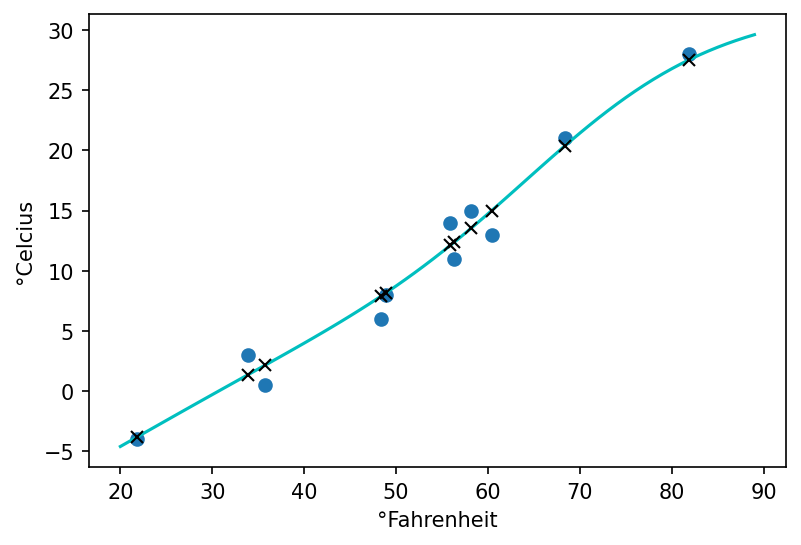

In [ ]:
#Evaluating the model 
from matplotlib import pyplot as plt

t_range=torch.arange(20.,90.).unsqueeze(1)

fig=plt.figure(dpi=150,facecolor='white')
plt.xlabel("°Fahrenheit")
plt.ylabel("°Celcius")
plt.plot(t_u.numpy(),t_c.numpy(),'o')
plt.plot(t_range.numpy(),seqmodel(0.1*t_range).detach().numpy(),'c-')
plt.plot(t_u.numpy(),seqmodel(0.1*t_u).detach().numpy(),'kx')

### **6.4 Exercise!**

In [ ]:
neuron_count=20

seqmodel=nn.Sequential(OrderedDict([('hidden_linear',nn.Linear(1,neuron_count)),
                                    ('hidden_activation',nn.Tanh()),
                                    ('output_linear',nn.Linear(neuron_count,1))
                                    ]))

optimizer=optim.SGD(seqmodel.parameters(),lr=1e-4)

trainingloop(n_epochs=5000,
             optimizer=optimizer,
             model=seqmodel,
             loss_fn=nn.MSELoss(),
             train_t_u=train_t_un,
             val_t_u=val_t_un,
             train_t_c=train_t_c,
             val_t_c=val_t_c)

Epoch 1, Training Loss 178.7157,Validation Loss 242.2064
Epoch 200, Training Loss 96.4964,Validation Loss 121.7675
Epoch 400, Training Loss 76.1373,Validation Loss 83.9780
Epoch 600, Training Loss 70.0393,Validation Loss 70.8242
Epoch 800, Training Loss 66.5052,Validation Loss 65.0190
Epoch 1000, Training Loss 62.4006,Validation Loss 61.1391
Epoch 1200, Training Loss 56.4168,Validation Loss 57.0724
Epoch 1400, Training Loss 50.6748,Validation Loss 52.6154
Epoch 1600, Training Loss 46.1499,Validation Loss 48.1672
Epoch 1800, Training Loss 42.5666,Validation Loss 44.5174
Epoch 2000, Training Loss 39.2297,Validation Loss 41.3522
Epoch 2200, Training Loss 36.0460,Validation Loss 38.4585
Epoch 2400, Training Loss 32.9922,Validation Loss 35.7482
Epoch 2600, Training Loss 30.0713,Validation Loss 33.1798
Epoch 2800, Training Loss 27.2897,Validation Loss 30.7284
Epoch 3000, Training Loss 24.6531,Validation Loss 28.3772
Epoch 3200, Training Loss 22.1834,Validation Loss 26.1268
Epoch 3400, Traini

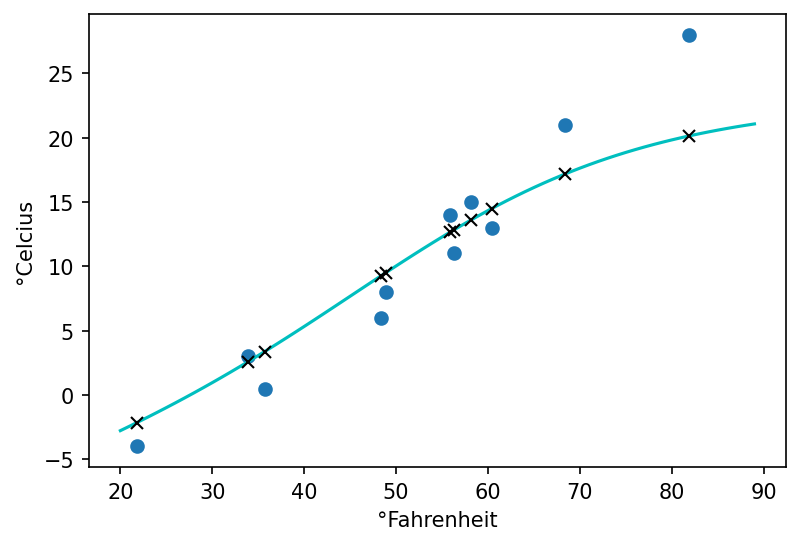

In [ ]:
t_range=torch.arange(20.,90.).unsqueeze(1)

fig=plt.figure(dpi=150,facecolor='white')
plt.xlabel("°Fahrenheit")
plt.ylabel("°Celcius")
plt.plot(t_u.numpy(),t_c.numpy(),'o')
plt.plot(t_range.numpy(),seqmodel(0.1*t_range).detach().numpy(),'c-')
plt.plot(t_u.numpy(),seqmodel(0.1*t_u).detach().numpy(),'kx')

### **6.5 Sub-classing NN Module**

In [ ]:
seqmodel=nn.Sequential(nn.Linear(1,11),
                       nn.Tanh(),
                       nn.Linear(11,1))

seqmodel

Sequential(
  (0): Linear(in_features=1, out_features=11, bias=True)
  (1): Tanh()
  (2): Linear(in_features=11, out_features=1, bias=True)
)

In [ ]:
from collections import OrderedDict

namedseq_model=nn.Sequential(OrderedDict([('hidden_linear',nn.Linear(1,12)),
                                          ('hidden_activation',nn.Tanh()),
                                          ('output_linear',nn.Linear(12,1))]))

namedseq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=12, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=12, out_features=1, bias=True)
)

In [ ]:
#Creating the subclass of nn.Module
class SubclassModel(nn.Module):
  def __init__(self):
    super().__init__()
    #This is nn.Module's __init__ which sets up the housekeeping, and it is a must

    self.hidden_linear=nn.Linear(1,13)
    self.hidden_activation=nn.Tanh()
    self.output_linear=nn.Linear(13,1)
  
  def forward(self,input):
    hidden_t=self.hidden_linear(input)
    activated_t=self.hidden_activation(hidden_t)
    output_t=self.output_linear(activated_t)

    return output_t

subclass_model=SubclassModel()
subclass_model

SubclassModel(
  (hidden_linear): Linear(in_features=1, out_features=13, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=13, out_features=1, bias=True)
)

In [ ]:
for type_str, model in [('seq',seqmodel),('namedseq',namedseq_model),('subclass',subclass_model)]:
  print(type_str)
  for name_str, param in model.named_parameters():
    print("{:21} {:19} {}".format(name_str,str(param.shape),param.numel()))
  print()

seq
0.weight              torch.Size([11, 1]) 11
0.bias                torch.Size([11])    11
2.weight              torch.Size([1, 11]) 11
2.bias                torch.Size([1])     1

namedseq
hidden_linear.weight  torch.Size([12, 1]) 12
hidden_linear.bias    torch.Size([12])    12
output_linear.weight  torch.Size([1, 12]) 12
output_linear.bias    torch.Size([1])     1

subclass
hidden_linear.weight  torch.Size([13, 1]) 13
hidden_linear.bias    torch.Size([13])    13
output_linear.weight  torch.Size([1, 13]) 13
output_linear.bias    torch.Size([1])     1



Using the code of subclassing, we can show 